In [179]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

%run utils/stat_helper_functions

packages imported


In [180]:
# read file
path = '/Users/mehipour/Desktop/data/'
file_path = path + 'R_lung_ma_data_06-Oct-2020.csv'
df = pd.read_csv(file_path)

# remove space from column names and values
df.columns = df.columns.str.lstrip()
df['cohort'] = df['cohort'].str.lstrip()

# reivew data
df.head()

,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total,chi_sq,r_squred,n_spec
0,20,Perfused,38.8500,234.5190,0.6266,214.0267,1437.4063,1.0000,1.0000,-212.6210,0.9543,1.0
1,20,Perfused,98.6000,194.5203,0.6491,231.1217,1234.9298,0.7681,0.9654,60.6737,0.9485,2.0
2,20,Perfused,116.4167,181.0622,0.6109,257.7336,1257.4352,0.6411,0.8826,781.4308,0.9380,2.0
3,20,Perfused,133.7917,173.3189,0.5959,276.2351,1321.4600,0.5726,0.8039,1473.7486,0.9372,2.0
4,20,Perfused,151.4500,183.8889,0.6166,301.5678,1413.3942,0.5565,0.7974,2340.6491,0.9421,2.0


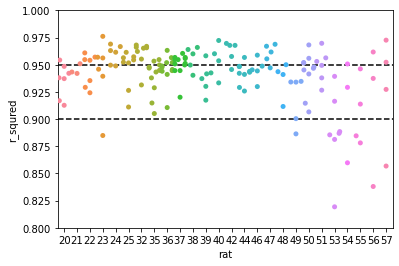

In [165]:
# check fit quality for rats
sns.swarmplot(x='rat', y='r_squred', size=5, data=df)
plt.axhline(0.95, ls='--', c=[0,0,0])
plt.axhline(0.9, ls='--', c=[0,0,0])
plt.ylim([0.8, 1.0])
plt.show()

In [166]:
# apply linear regression for each rat to get atp2pi, atp2total and ec slopes
lm_total = LinearRegression()
lm_pi = LinearRegression()
lm_ec = LinearRegression()

# get weights
rats = df['rat'].unique()
df_summary = pd.DataFrame(columns=['cohort', 'slope_atp2total', 'intercept_atp2total',
                                   'slope_atp2pi', 'intercept_atp2pi', 'slope_ec', 'intercept_ec'], index=rats)

df_goodfits = df[df['r_squred'] > 0.9]

# linear regression
for rat in rats:
    # time
    df_rat = df_goodfits[df_goodfits['rat'] == rat]
    t_hr = df_rat['t_min'].values.reshape(-1,1)/60
    # atp2total
    y = df_rat['atp2total'].values.reshape(-1,1)
    lm_total.fit(t_hr,y)
    # atp2pi
    y = df_rat['atp2pi'].values.reshape(-1,1)
    lm_pi.fit(t_hr,y)
    # ec
    y = df_rat['ec'].values.reshape(-1,1)
    lm_ec.fit(t_hr,y)
    cohort = df[df['rat']==rat]['cohort'].unique()[0]
    df_summary.loc[rat] = [cohort,
                           -lm_total.coef_[0][0], lm_total.intercept_[0],
                           -lm_pi.coef_[0][0], lm_pi.intercept_[0],
                           -lm_ec.coef_[0][0], lm_ec.intercept_[0]] 
df_summary.head()

,cohort,slope_atp2total,intercept_atp2total,slope_atp2pi,intercept_atp2pi,slope_ec,intercept_ec
20,Perfused,0.113475,1.09382,0.215355,1.10507,0.0149244,0.64754
21,Perfused,0.0438805,1.02605,0.203855,1.11068,-0.0433101,0.585242
22,Perfused,0.0424494,1.01418,0.152404,0.970118,0.00375123,0.654984
23,Cold,0.0319388,1.02779,0.0928852,1.03119,0.00146909,0.610316
24,Cold,0.200247,1.22423,0.26033,1.19345,0.0614617,0.715796


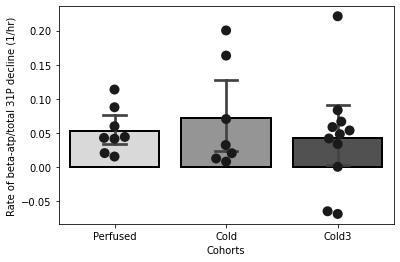

In [167]:
# show barplots for atp2total
ax = sns.barplot(x='cohort', y='slope_atp2total', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2total',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

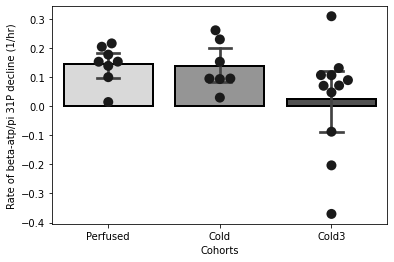

In [168]:
# show barplots for atp2pi
ax = sns.barplot(x='cohort', y='slope_atp2pi', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2pi',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/pi 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

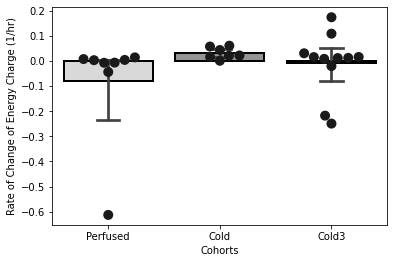

In [169]:
# show barplots for ec
ax = sns.barplot(x='cohort', y='slope_ec', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_ec',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of Change of Energy Charge (1/hr)')
plt.xlabel('Cohorts')
plt.show()

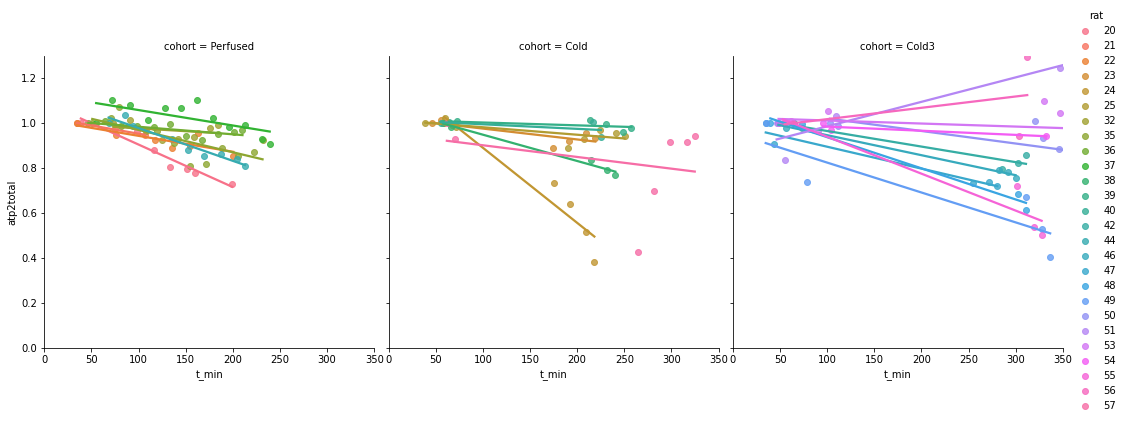

In [170]:
# look at individual decline of atp2total vs time for each group:
df_cold3 = df_goodfits[df_goodfits.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2total',
           hue='rat', col='cohort', ci=None, data=df)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()

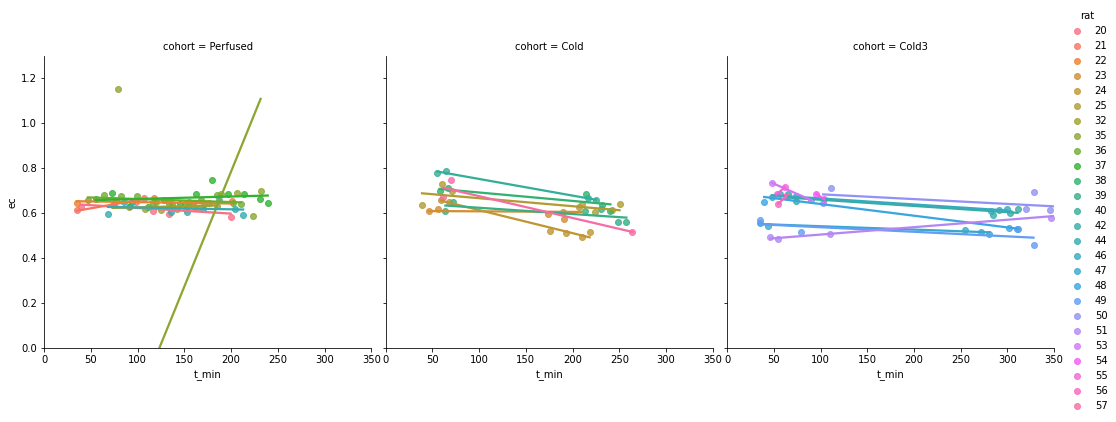

In [172]:
# look at individual decline of atp2pi vs time for each group:
df_cold3 = df[df.cohort=='Cold3']
sns.lmplot(x='t_min', y='ec',
           hue='rat', col='cohort', ci=None, data=df_goodfits)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()

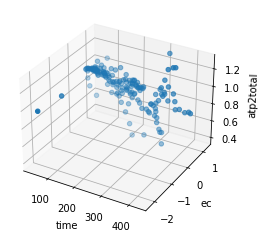

In [173]:
# 3D plot of time, enercy charge and atp2total
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.t_min, df.ec, df.atp2total)
ax.set_xlabel('time')
ax.set_ylabel('ec')
ax.set_zlabel('atp2total')
plt.show()


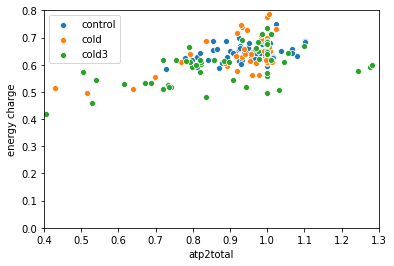

In [175]:
# df.cohort = df.cohort.astype('category')
df_control = df[df['cohort']=='Perfused']
df_cold = df[df['cohort']=='Cold']
df_cold3 = df[df['cohort']=='Cold3']
sns.scatterplot(x="atp2total", y="ec", data=df_control, label='control')
sns.scatterplot(x="atp2total", y="ec", data=df_cold, label='cold')
sns.scatterplot(x="atp2total", y="ec", data=df_cold3, label='cold3')
plt.ylabel('energy charge')
plt.xlabel('atp2total')
plt.legend()
plt.xlim([0.4,1.3])
plt.ylim([0.,0.8])
plt.show()


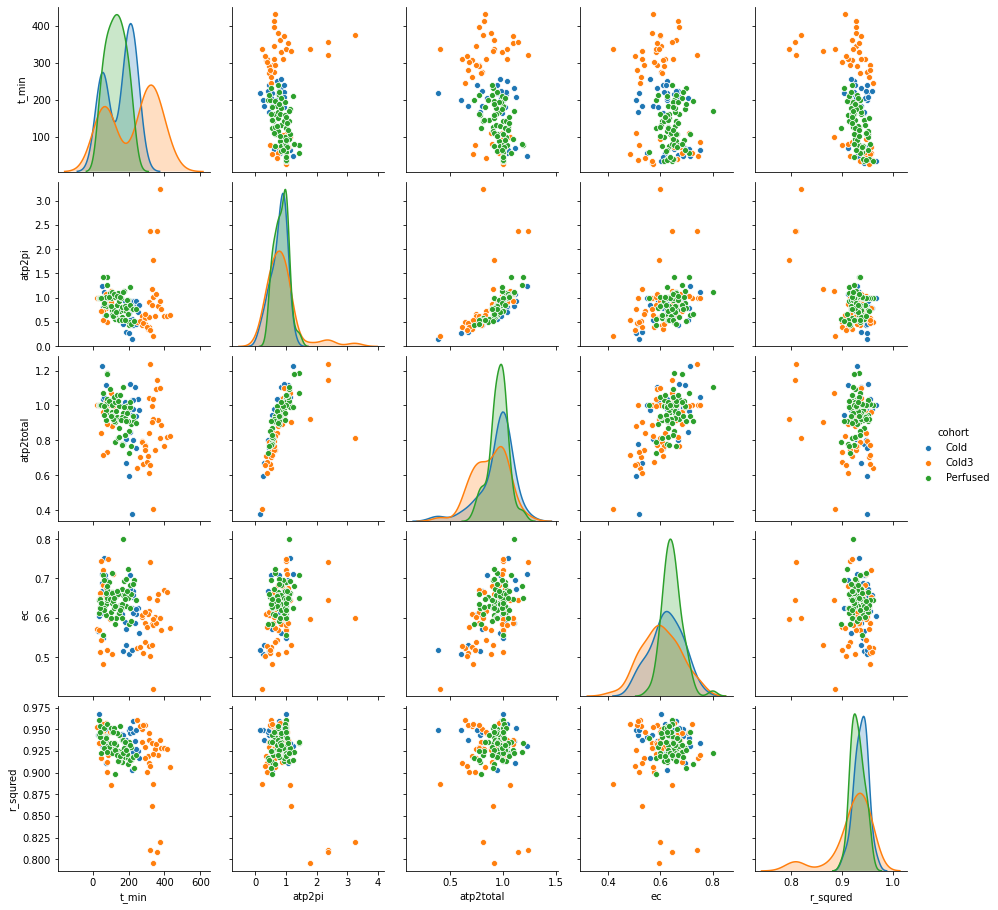

In [118]:
cols = ['t_min','atp2pi','atp2total','ec','r_squred','cohort']
sns.pairplot(df[cols], hue="cohort")
plt.show()

In [189]:
# Linear Mixed effect model
df["t_hr"] = df['t_min']/60
md = smf.mixedlm("atp2total ~ t_hr", df, groups=df["cohort"])
mdf = md.fit()
print(mdf.summary())



         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: atp2total
No. Observations: 169     Method:             REML     
No. Groups:       3       Scale:              0.0181   
Min. group size:  42      Log-Likelihood:     92.4921  
Max. group size:  68      Converged:          Yes      
Mean group size:  56.3                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.008    0.022 46.862 0.000  0.966  1.050
t_hr         -0.031    0.006 -5.088 0.000 -0.042 -0.019
Group Var     0.000    0.005                           

/Users/mehipour/anaconda3/envs/nmr_env_conda/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/mehipour/anaconda